<a href="https://colab.research.google.com/github/eminshall/Notebooks-Youtube-Channel/blob/main/Moving_Average_Strategy_with_VectorBT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import vectorbt as vbt
from datetime import datetime, date
import datetime
import yfinance as yf

In [ ]:
pfolio3 = ['ACN', 'BNY','CVX','DE','FDX','GD','HD','INTU','LLY']

end = date.today()
start = end - datetime.timedelta(days = 5*365)

prices = yf.download(pfolio3, start, end)['Close']
prices.head()

[*********************100%***********************]  9 of 9 completed


Ticker,ACN,BNY,CVX,DE,FDX,GD,HD,INTU,LLY
Date,,,,,,,,,
2020-02-10,198.257126,11.608145,87.905457,157.068176,143.627625,165.178619,213.298035,288.341278,136.381088
2020-02-11,197.874649,11.600229,89.042427,158.954025,144.745331,165.790573,214.211090,287.547241,135.200134
2020-02-12,197.734741,11.631882,89.706963,160.419815,145.212509,167.395782,214.166779,289.222534,134.506561
2020-02-13,198.117188,11.581080,89.402718,159.420837,147.924225,167.998871,214.849365,288.438141,133.592728
2020-02-14,198.089203,11.525516,89.167809,156.909500,145.313278,166.783844,217.216293,294.684631,132.952057


In [ ]:
fast_ma = vbt.MA.run(prices, 10, short_name='fast')
slow_ma = vbt.MA.run(prices, 30, short_name='slow')

In [ ]:
prices['ACN']

,ACN
Date,
2020-02-10,198.257126
2020-02-11,197.874649
2020-02-12,197.734741
2020-02-13,198.117188
2020-02-14,198.089203
...,...
2025-02-03,385.209991
2025-02-04,391.619995
2025-02-05,398.250000


In [ ]:
df = pd.DataFrame(prices['ACN'])
df['fast'] =  prices['ACN'].rolling(10).mean()
df['slow'] = prices['ACN'].rolling(30).mean()
df.tail()

,ACN,fast,slow
Date,,,
2025-02-03,385.209991,371.807004,360.480668
2025-02-04,391.619995,375.327002,361.947668
2025-02-05,398.250000,379.241003,362.817335
2025-02-06,387.339996,381.649002,363.516335
2025-02-07,385.980011,384.006003,364.423336


<Axes: title={'center': 'ACN MAs Example'}, xlabel='Date'>

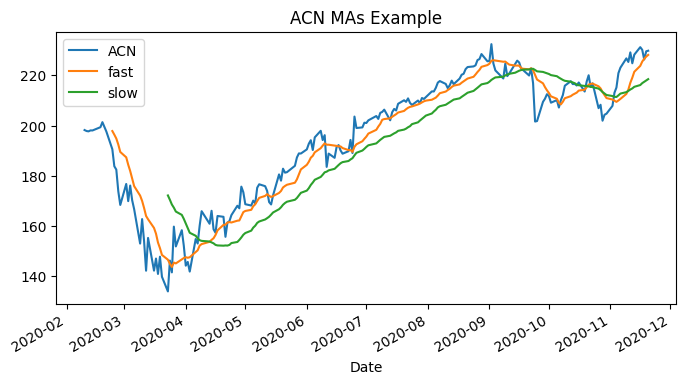

In [ ]:
df[:200].plot(title='ACN MAs Example', figsize=(8,4))

In [ ]:
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
entries.head()

fast_window     10                                                        
slow_window     30                                                        
Ticker         ACN    BNY    CVX     DE    FDX     GD     HD   INTU    LLY
Date                                                                      
2020-02-10   False  False  False  False  False  False  False  False  False
2020-02-11   False  False  False  False  False  False  False  False  False
2020-02-12   False  False  False  False  False  False  False  False  False
2020-02-13   False  False  False  False  False  False  False  False  False
2020-02-14   False  False  False  False  False  False  False  False  False

In [ ]:
pf = vbt.Portfolio.from_signals(prices, entries, exits)

<Axes: xlabel='Ticker'>

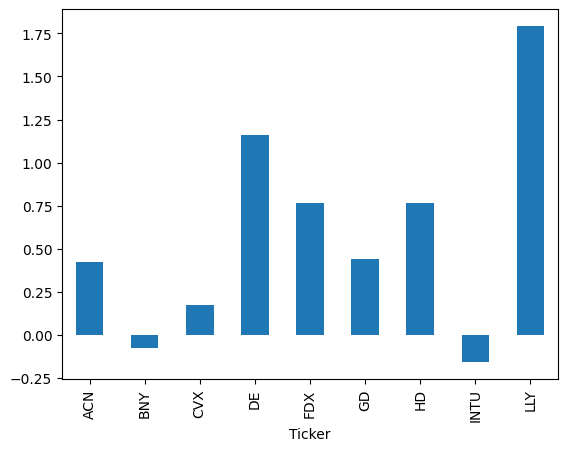

In [ ]:
pf.total_return().groupby("Ticker").mean().plot(kind='bar')

<Axes: xlabel='Ticker'>

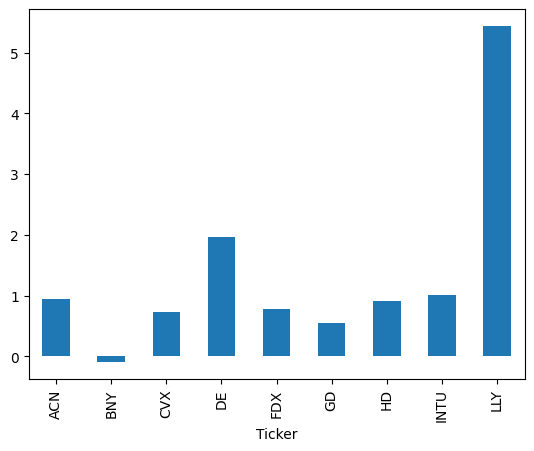

In [ ]:
vbt.Portfolio.from_holding(prices, freq='1d').total_return().groupby("Ticker").mean().plot(kind='bar')

#Consider Supporting Me

Making theses videos takes time and effort. Contributions from viewers like you help support my channel and avoid the need for promoting a Patreon, sponsors, or selling a course. Click the link and choose any amount you'd like. Thank you.

https://ko-fi.com/minshallsfi